##fmnist Classification

In [1]:
import torch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
torch.manual_seed(42)

In [4]:
path = "/content/drive/MyDrive/deeplearning/fmnist_small.csv"

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [8]:
df.shape

(6000, 785)

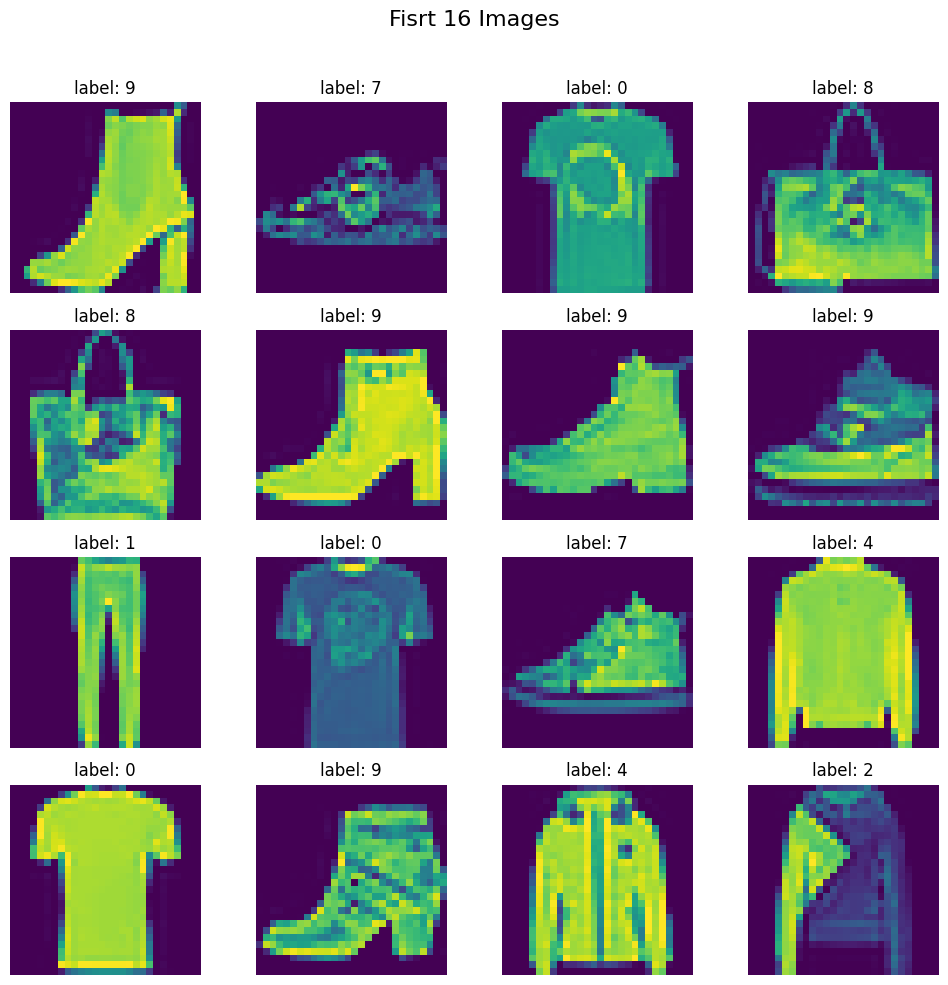

In [9]:
#create a 4x4 grid of images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("Fisrt 16 Images", fontsize=16)

#plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28) # reshpae to 28*28
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [10]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [11]:
X.shape

(6000, 784)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42 , test_size=0.2)

In [14]:
X_train.shape

(4800, 784)

In [15]:
y_train.shape

(4800,)

In [16]:
#scalling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
#dataloader and dataset
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.features = torch.tensor(X,dtype=torch.float32)
    self.labels = torch.tensor(y, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index], self.labels[index]

In [18]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [19]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
#model architecture

import torch.nn as nn

class ANN(nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)  # no need to explictly define the softmax function which is handeld by bce
    )

  def forward(self,x):
    return self.model(x)


In [22]:
epochs = 100
learning_rate = 0.1

In [23]:
model = ANN(X_train.shape[1])

In [24]:
criterion = nn.CrossEntropyLoss()

In [25]:
# optimizer
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
len(train_loader)

150

In [27]:
#trainig loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:

    #forward pass
    outputs = model(batch_features)

    #compute loss
    loss = criterion(outputs, batch_labels)

    #backpropagation
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 1.3216
Epoch 2, Loss: 0.7793
Epoch 3, Loss: 0.6428
Epoch 4, Loss: 0.5752
Epoch 5, Loss: 0.5279
Epoch 6, Loss: 0.4953
Epoch 7, Loss: 0.4619
Epoch 8, Loss: 0.4355
Epoch 9, Loss: 0.4189
Epoch 10, Loss: 0.3974
Epoch 11, Loss: 0.3867
Epoch 12, Loss: 0.3713
Epoch 13, Loss: 0.3490
Epoch 14, Loss: 0.3476
Epoch 15, Loss: 0.3159
Epoch 16, Loss: 0.3120
Epoch 17, Loss: 0.2958
Epoch 18, Loss: 0.2883
Epoch 19, Loss: 0.2713
Epoch 20, Loss: 0.2599
Epoch 21, Loss: 0.2577
Epoch 22, Loss: 0.2450
Epoch 23, Loss: 0.2397
Epoch 24, Loss: 0.2228
Epoch 25, Loss: 0.2220
Epoch 26, Loss: 0.2104
Epoch 27, Loss: 0.2200
Epoch 28, Loss: 0.2130
Epoch 29, Loss: 0.1838
Epoch 30, Loss: 0.1852
Epoch 31, Loss: 0.1919
Epoch 32, Loss: 0.1870
Epoch 33, Loss: 0.1777
Epoch 34, Loss: 0.1775
Epoch 35, Loss: 0.1606
Epoch 36, Loss: 0.1716
Epoch 37, Loss: 0.1600
Epoch 38, Loss: 0.1498
Epoch 39, Loss: 0.1466
Epoch 40, Loss: 0.1398
Epoch 41, Loss: 0.1385
Epoch 42, Loss: 0.1364
Epoch 43, Loss: 0.1268
Epoch 44, Loss: 0.13

In [28]:
#set model to eval mode
model.eval()

ANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#understanding of max function of torch
tensor = torch.tensor([[1, 3, 5],
                       [2, 8, 4]])

max_values, indices = torch.max(tensor, dim=1)

print(max_values)  # Output: tensor([5, 8]) -> max in each row
print(indices)     # Output: tensor([2, 1]) -> indices of max values

In [31]:
#evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)

    _,predicted = torch.max(outputs,1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print(correct/total)

0.8333333333333334


In [30]:
import torch

# Example ground truth labels (actual classes)
batch_labels = torch.tensor([0, 1, 2, 2, 1])

# Example model predictions
predicted = torch.tensor([0, 1, 1, 2, 1])

# Compare predicted labels with actual labels
correct_predictions = (predicted == batch_labels)  # Boolean tensor

print(correct_predictions)
# Output: tensor([ True,  True, False,  True,  True])

# Count correct predictions
num_correct = correct_predictions.sum()  # Summing Trues (1s)
print(num_correct)
# Output: tensor(4)

# Convert tensor count to Python integer
num_correct = num_correct.item()
print(num_correct)
# Output: 4

# Updating the total correct count
correct = 0
correct += num_correct
print(correct)
# Output: 4


tensor([ True,  True, False,  True,  True])
tensor(4)
4
4
